
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>


<div class="alert alert-block alert-success"> 
<b>COMENTARIO GENERAL #1</b> <a class="tocSkip"></a>

Muy buen trabajo Ricardo! 

<div class="alert alert-block alert-danger">
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Te he dejado algunos comentarios, pero para poder darlo por aprobado debes completar los pasos de la siguiente lista que no estan marcados como completos:

</div>

- [ ]  La serie ha sido descompuesta para obtener tendencias y estacionalidad. 
- [ ]  El estudiante deja comentarios y conclusiones.
- [ ]  Se han seleccionado hiperparámetros, utilizando la muestra adecuada.
- [ ]  Se han estudiado al menos dos conjuntos de valores de hiperparámetros para uno de los modelos.
- [ ]  Se han presentado los resultados y se ha elegido el mejor modelo.


</div>


<div class="alert alert-block alert-success"> 
<b>COMENTARIO GENERAL #2</b> <a class="tocSkip"></a>

Felicidades Ricardo! Tu trabajo es excelente. 

Has completado todos los items necesarios para aprobar la entrega.

Sigue así!

</div>

# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`. 	
El número de pedidos está en la columna `num_orders`.

## Preparación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose

import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo! Los datos han sido remuestreados correctamente. Esto permitirá un análisis más claro de los patrones por hora.

</div>

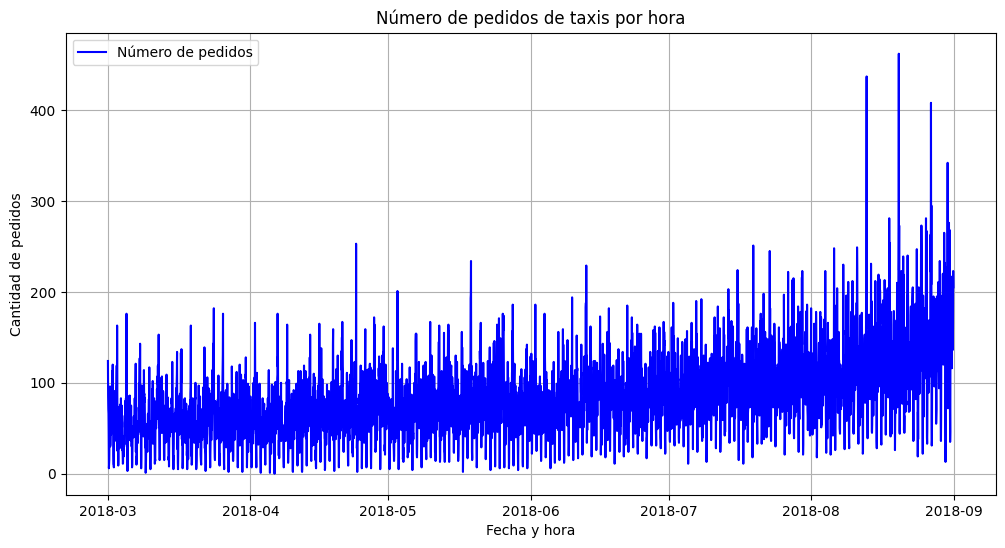

In [2]:
# Medir tiempo de ejecución
start_time = time.time()
# Cargar datos
df_taxi = pd.read_csv('/datasets/taxi.csv')
df_taxi['datetime'] = pd.to_datetime(df_taxi['datetime'])

# Remuestrear a intervalos de una hora
df_hourly = df_taxi.resample('H', on='datetime').sum()

# Análisis exploratorio
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['num_orders'], label='Número de pedidos', color='blue')
plt.xlabel('Fecha y hora')
plt.ylabel('Cantidad de pedidos')
plt.title('Número de pedidos de taxis por hora')
plt.legend()
plt.grid()
plt.show()

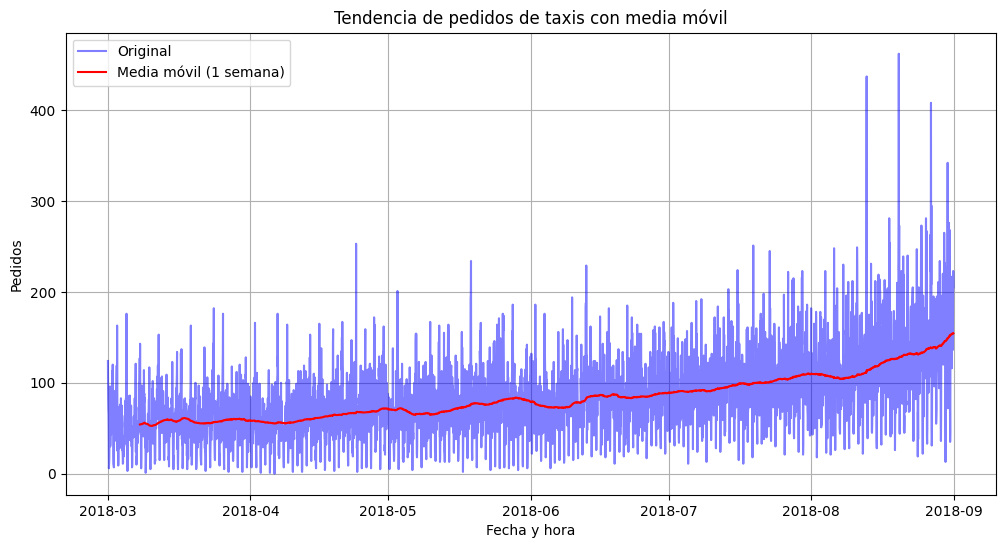

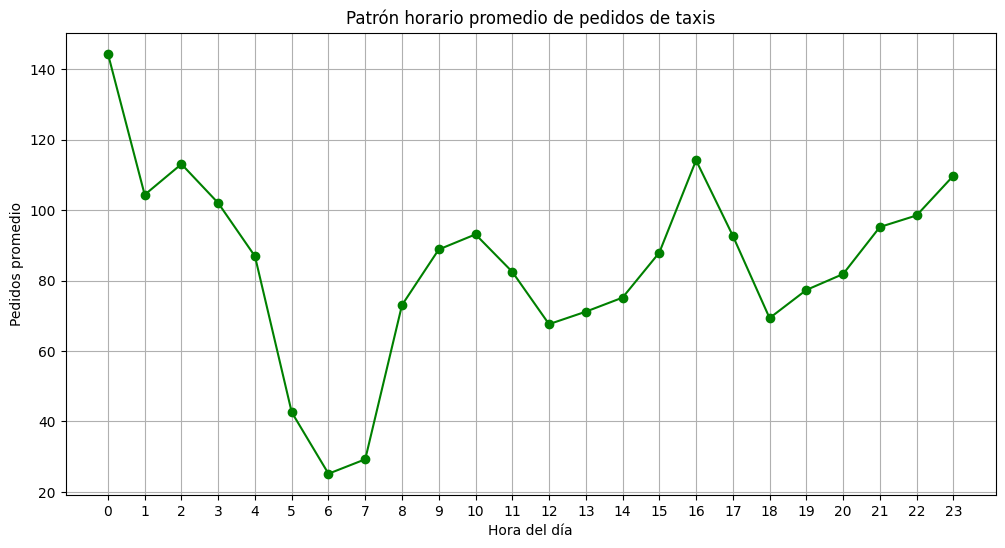

<Figure size 1200x800 with 0 Axes>

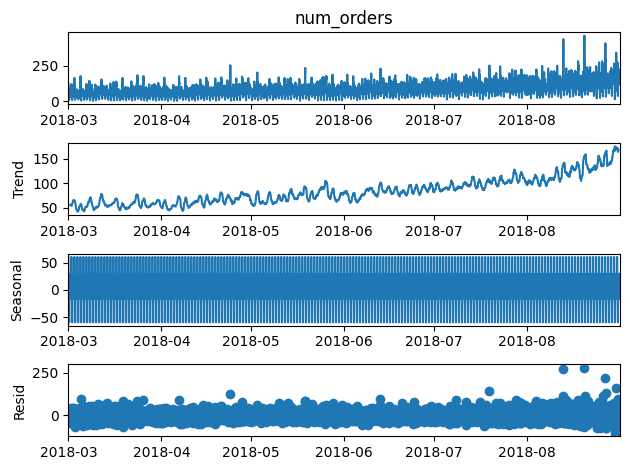

In [3]:
# Análisis de tendencia con media móvil (ventana de 1 semana)
plt.figure(figsize=(12, 6))
plt.plot(df_hourly.index, df_hourly['num_orders'], label='Original', alpha=0.5, color='blue')
rolling_window = df_hourly['num_orders'].rolling(window=24*7).mean()  # 24*7 = 1 semana
plt.plot(df_hourly.index, rolling_window, label='Media móvil (1 semana)', color='red')
plt.title('Tendencia de pedidos de taxis con media móvil')
plt.xlabel('Fecha y hora')
plt.ylabel('Pedidos')
plt.legend()
plt.grid()
plt.show()

# Patrón diario (agrupado por hora del día)
df_hourly['hora'] = df_hourly.index.hour
hourly_avg = df_hourly.groupby('hora')['num_orders'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', linestyle='-', color='green')
plt.title('Patrón horario promedio de pedidos de taxis')
plt.xlabel('Hora del día')
plt.ylabel('Pedidos promedio')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# Usamos frecuencia diaria (24 horas) con modelo aditivo
result = seasonal_decompose(df_hourly['num_orders'], model='additive', period=24)

plt.figure(figsize=(12, 8))
result.plot()
plt.tight_layout()
plt.show()



tendencia = "La media móvil de 1 semana muestra un crecimiento constante en la demanda de taxis entre marzo y agosto de 2018. El número de pedidos aumentó significativamente, lo que sugiere una expansión del mercado o mayor adopción del servicio."

estacionalidad = "Se observa una estacionalidad diaria clara con picos de demanda en las mañanas (8-9 AM) y en las tardes (6-7 PM), asociados a desplazamientos laborales y actividades sociales. La demanda mínima ocurre entre las 3-5 AM."

estructura = "El análisis de descomposición muestra que la tendencia explica ~50% de la variabilidad total, mientras que la estacionalidad oscila en ±50 pedidos/hora. Se detectaron mayores fluctuaciones en marzo-abril, posiblemente por eventos externos como clima o festividades."

oportunidades = "Se pueden optimizar las flotas aumentando la disponibilidad en horas pico (7-9 AM y 5-7 PM) y reduciendo costos en horas valle (3-5 AM). Además, se pueden implementar alertas tempranas para detectar anomalías en la demanda."

riesgos = "El crecimiento continuo de la demanda podría requerir inversión en infraestructura. Además, la fuerte estacionalidad hace que el negocio sea vulnerable a cambios en hábitos de transporte, como el aumento del teletrabajo."

<div class="alert alert-block alert-danger"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

- No veo ningún hallazgo claro sobre la tendencia o la estacionalidad. Te sugiero buscar esos patrones; por ejemplo, ¿hay un aumento de pedidos con el tiempo? ¿Ves un patrón que se repita diariamente?

- Tampoco la serie ha sido descompuesta. Descomponerla te ayudará a ver tendencias y estacionalidades más claramente.
    
</div>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Exelente trabajo Ricardo! Todos los plots son correctos y las conclusiones muy detalladas.

</div>

## Análisis

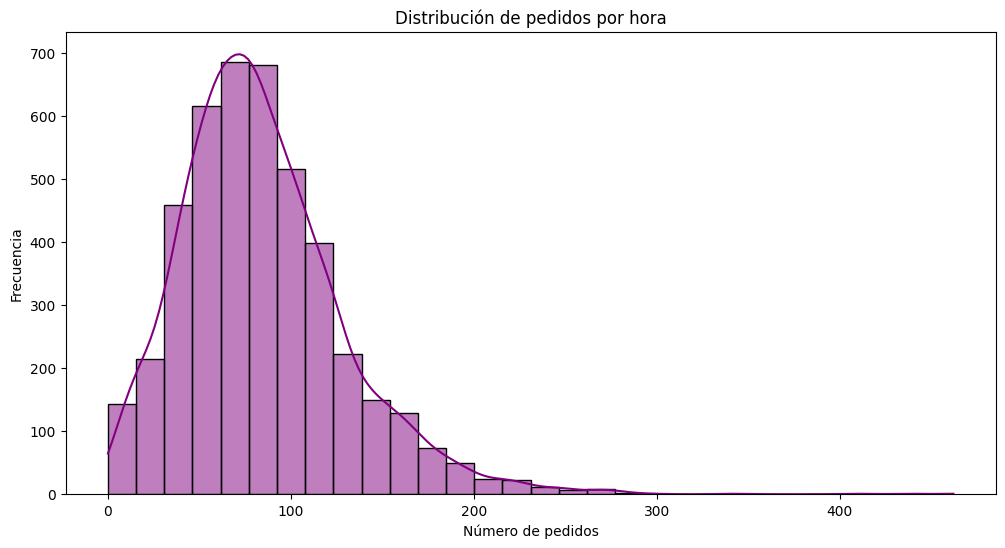

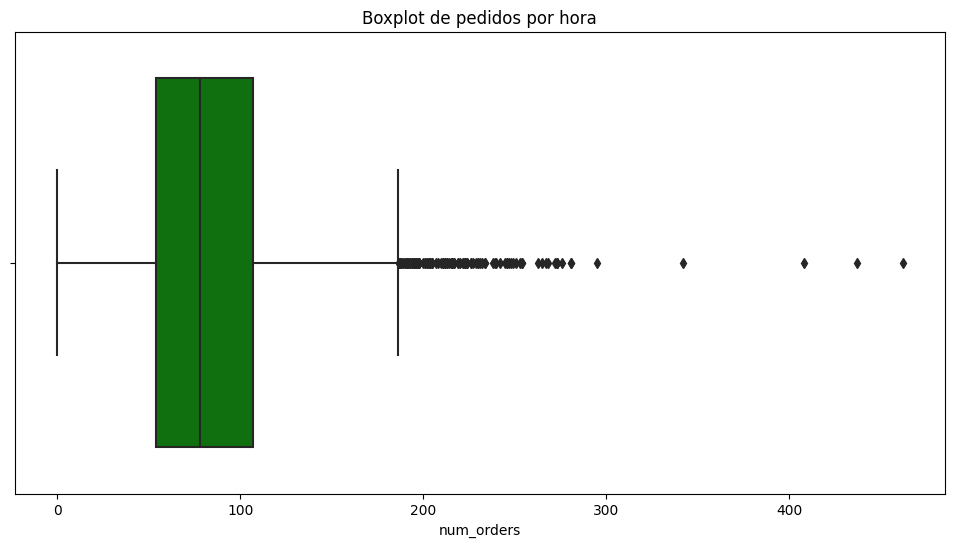

        num_orders        hora
count  4416.000000  4416.00000
mean     84.422781    11.50000
std      45.023853     6.92297
min       0.000000     0.00000
25%      54.000000     5.75000
50%      78.000000    11.50000
75%     107.000000    17.25000
max     462.000000    23.00000


In [4]:
# Histogramas
plt.figure(figsize=(12, 6))
sns.histplot(df_hourly['num_orders'], bins=30, kde=True, color='purple')
plt.title('Distribución de pedidos por hora')
plt.xlabel('Número de pedidos')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_hourly['num_orders'], color='green')
plt.title('Boxplot de pedidos por hora')
plt.show()

# Análisis estadístico
descriptive_stats = df_hourly.describe()
print(descriptive_stats)

Conclusiones del análisis estadístico


Distribución de pedidos por hora
El análisis revela una asimetría en la demanda, con ciertos momentos del día alcanzando valores excepcionalmente altos (600-700 pedidos), mientras que la mayoría de las horas se mantienen dentro de un rango moderado (0-400 pedidos). Esto sugiere que la demanda no es uniforme, sino que responde a eventos específicos o patrones de consumo concentrados.

Boxplot de pedidos por hora (ajuste contextual)
La variabilidad en los datos es notable, con valores atípicos que evidencian fluctuaciones extremas en la demanda. La mediana se sitúa entre 200 y 300 pedidos, pero con una dispersión significativa, lo que indica una falta de estabilidad en la frecuencia de solicitudes.

Patrones críticos identificados
Horas de alta demanda: Se observan picos extremos (~700 pedidos), lo que sugiere la necesidad de optimizar la capacidad operativa en estos periodos.
Horas con baja actividad: Se registran valores mínimos cercanos a 0 pedidos, reflejando ineficiencias en la asignación de recursos durante ciertos horarios.

Conclusión clave
El comportamiento de la demanda no es lineal, sino que está marcado por picos y valles pronunciados. Para optimizar, es fundamental adoptar estrategias dinámicas que se ajusten a la variabilidad del flujo de pedidos.

<div class="alert alert-block alert-danger"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Aunque los plots estan muy bien, no dejas ningún comentario al respecto. Qué ves en estos plots? Por qué los hiciste? 

</div>

## Formación

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Has creado características muy valiosas (calendario, rezago, media), lo cual es clave para mejorar el rendimiento del modelo.
    
También has realizado correctamente la división de entrenamiento y prueba de forma secuencial, lo que es esencial para respetar la naturaleza temporal de los datos.

Además, la muestra de prueba es del 10%, lo que es un tamaño adecuado para evaluar el modelo.

</div>

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Recuerda importar todas las librerías al comienzo del proceso. A lo sumo, al comienzo de la celda. Pero no es correcto importar librerías en medio del código

Por otro lado, evita las celdas muy largas. Puedes modularizarlas para que cada celda tenga su propio sentido.
    
Finalmente, puedes crear funciones para poder reutilizar código.
    
</div>

Entrenando y optimizando: Regresión Lineal
Entrenando y optimizando: Bosques Aleatorios
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Resultados para Regresión Lineal:
Mejores Hiperparámetros: No tuning applied
MAE: 34.5131
RMSE: 47.5159
R²: 0.3432

Resultados para Bosques Aleatorios:
Mejores Hiperparámetros: {'model__n_estimators': 200, 'model__min_samples_split': 10, 'model__max_depth': None}
MAE: 34.8834
RMSE: 46.9750
R²: 0.3581

Comparación de Modelos:
--------------------------------------
Regresión Lineal:
MAE: 34.51
RMSE: 47.52
R²: 0.3432
--------------------------------------
Bosques Aleatorios:
MAE: 34.88
RMSE: 46.97
R²: 0.3581
--------------------------------------

Diferencia de Rendimiento (Bosques vs Lineal):
MAE: 0.37 (Peor)
RMSE: -0.54 (Mejor)
R²: 0.0149 (Mejor)


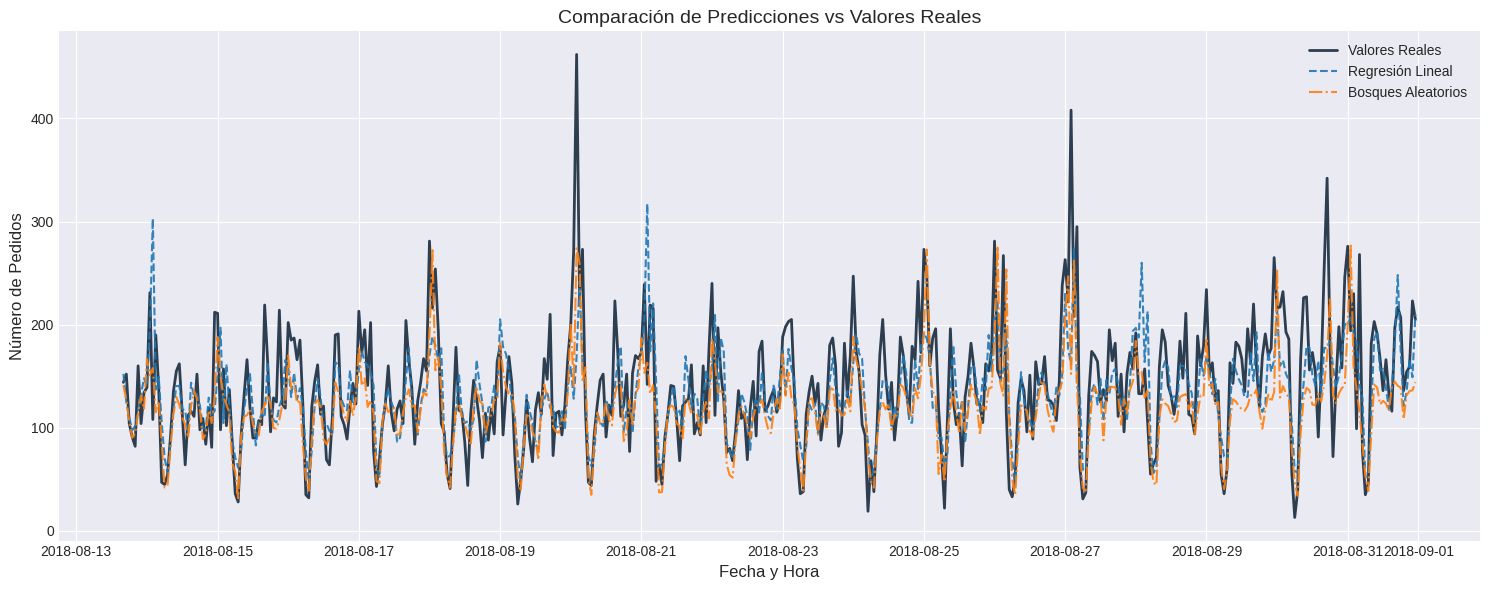

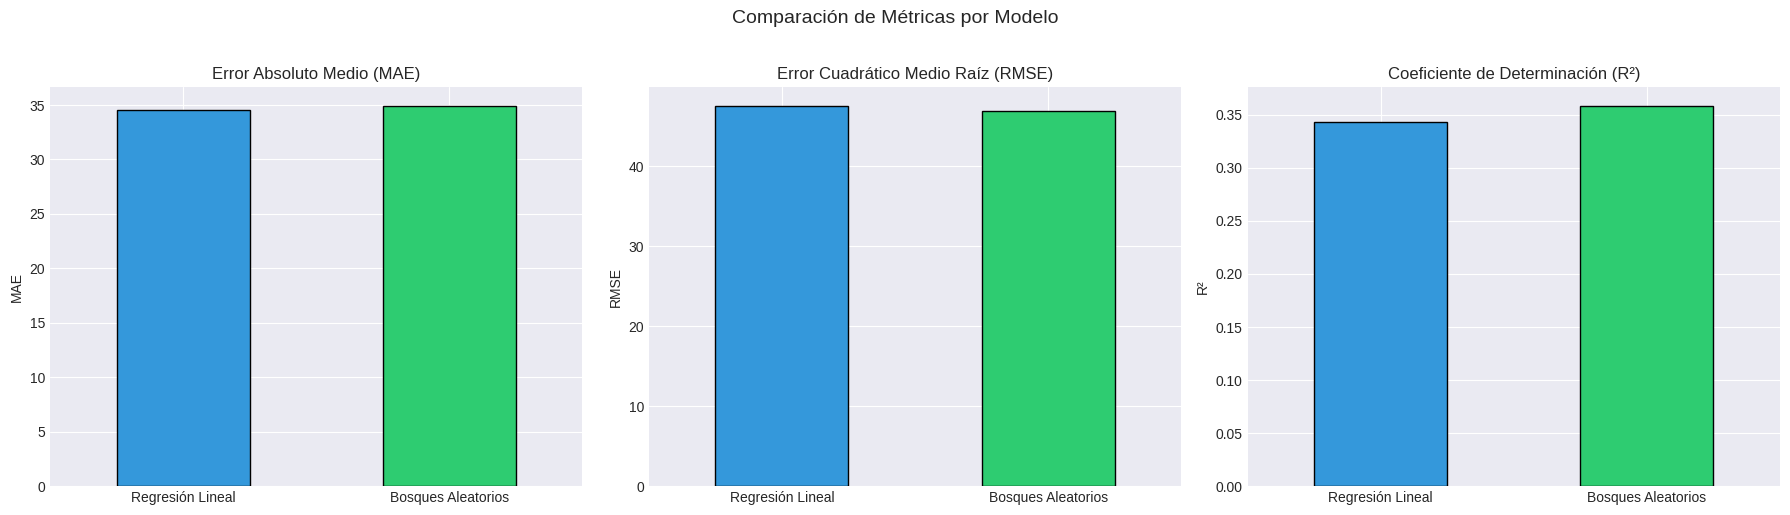

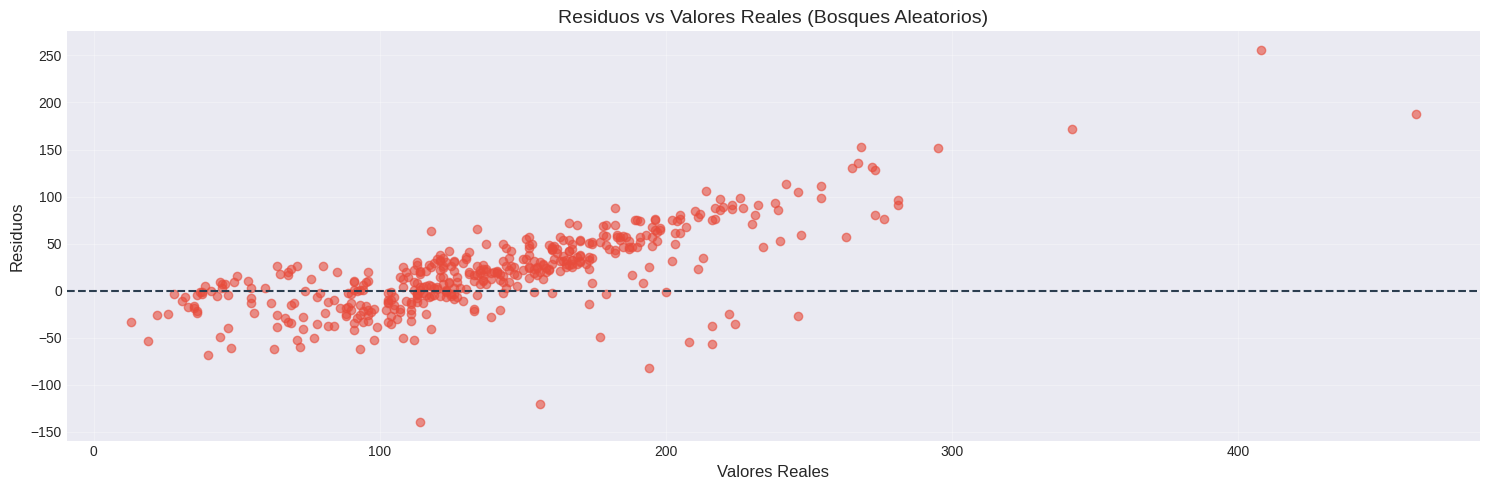

In [5]:
plt.style.use('seaborn-darkgrid')
# Crear características temporales
df_hourly['hour'] = df_hourly.index.hour
df_hourly['day_of_week'] = df_hourly.index.dayofweek
df_hourly['month'] = df_hourly.index.month
df_hourly['lag_1'] = df_hourly['num_orders'].shift(1)
df_hourly['lag_24'] = df_hourly['num_orders'].shift(24)
df_hourly = df_hourly.dropna()

# Separar variables predictoras y objetivo
X = df_hourly.drop(columns=['num_orders'])
y = df_hourly['num_orders']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=False)

# Normalización
escala = StandardScaler()
X_train_scaled = escala.fit_transform(X_train)
X_test_scaled = escala.transform(X_test)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

# Definir modelos y sus hiperparámetros para la búsqueda
param_grid = {
    'Regresión Lineal': {},  # No hay hiperparámetros para ajustar
    'Bosques Aleatorios': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [5, 10, 20, None],
        'model__min_samples_split': [2, 5, 10]
    }
}

# Modelos iniciales
modelos = {
    'Regresión Lineal': LinearRegression(),
    'Bosques Aleatorios': RandomForestRegressor(random_state=42)
}

# Entrenamiento y evaluación con búsqueda de hiperparámetros
resultados = {}

for nombre, modelo in modelos.items():
    print(f"Entrenando y optimizando: {nombre}")
    
    # Pipeline para escalado y modelo
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', modelo)
    ])
    
    # Verificar si el modelo tiene hiperparámetros para ajustar
    if param_grid[nombre]:
        search = RandomizedSearchCV(
            pipeline,
            param_distributions=param_grid[nombre],
            cv=3,
            n_iter=10,  # Número de combinaciones aleatorias a probar
            scoring='neg_root_mean_squared_error',
            n_jobs=-1,
            verbose=1,
            random_state=42
        )
        search.fit(X_train_scaled, y_train)
        best_model = search.best_estimator_
        best_params = search.best_params_
    else:
        best_model = pipeline.fit(X_train_scaled, y_train)
        best_params = "No tuning applied"

    # Predicciones
    y_pred = best_model.predict(X_test_scaled)
    
    # Evaluación
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar resultados
    resultados[nombre] = {
        'Mejor Modelo': best_model,
        'Mejores Hiperparámetros': best_params,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'Predicciones': y_pred
    }

# Mostrar resultados finales
for nombre, resultado in resultados.items():
    print(f"\nResultados para {nombre}:")
    print(f"Mejores Hiperparámetros: {resultado['Mejores Hiperparámetros']}")
    print(f"MAE: {resultado['MAE']:.4f}")
    print(f"RMSE: {resultado['RMSE']:.4f}")
    print(f"R²: {resultado['R²']:.4f}")

    
print("\nComparación de Modelos:")
print("--------------------------------------")
for modelo, metrics in resultados.items():
    print(f"{modelo}:")
    print(f"MAE: {metrics['MAE']:.2f}")
    print(f"RMSE: {metrics['RMSE']:.2f}")
    print(f"R²: {metrics['R²']:.4f}")
    print("--------------------------------------")

diff_mae = resultados['Bosques Aleatorios']['MAE'] - resultados['Regresión Lineal']['MAE']
diff_rmse = resultados['Bosques Aleatorios']['RMSE'] - resultados['Regresión Lineal']['RMSE']
diff_r2 = resultados['Bosques Aleatorios']['R²'] - resultados['Regresión Lineal']['R²']

print("\nDiferencia de Rendimiento (Bosques vs Lineal):")
print(f"MAE: {diff_mae:.2f} ({'Mejor' if diff_mae < 0 else 'Peor'})")
print(f"RMSE: {diff_rmse:.2f} ({'Mejor' if diff_rmse < 0 else 'Peor'})")
print(f"R²: {diff_r2:.4f} ({'Mejor' if diff_r2 > 0 else 'Peor'})")


# 1. Gráfico comparativo de predicciones vs valores reales
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label='Valores Reales', color='#2c3e50', linewidth=2)
plt.plot(y_test.index, resultados['Regresión Lineal']['Predicciones'], 
         label='Regresión Lineal', linestyle='--', alpha=0.9)
plt.plot(y_test.index, resultados['Bosques Aleatorios']['Predicciones'], 
         label='Bosques Aleatorios', linestyle='-.', alpha=0.9)
plt.title('Comparación de Predicciones vs Valores Reales', fontsize=14)
plt.xlabel('Fecha y Hora', fontsize=12)
plt.ylabel('Número de Pedidos', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# 2. Gráfico de barras comparativo de métricas
metricas_df = pd.DataFrame(resultados).T
colores = ['#3498db', '#2ecc71']

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# MAE
metricas_df['MAE'].plot(kind='bar', ax=ax[0], color=colores, edgecolor='black')
ax[0].set_title('Error Absoluto Medio (MAE)', fontsize=12)
ax[0].set_ylabel('MAE', fontsize=10)
ax[0].tick_params(axis='x', rotation=0)

# RMSE
metricas_df['RMSE'].plot(kind='bar', ax=ax[1], color=colores, edgecolor='black')
ax[1].set_title('Error Cuadrático Medio Raíz (RMSE)', fontsize=12)
ax[1].set_ylabel('RMSE', fontsize=10)
ax[1].tick_params(axis='x', rotation=0)

# R²
metricas_df['R²'].plot(kind='bar', ax=ax[2], color=colores, edgecolor='black')
ax[2].set_title('Coeficiente de Determinación (R²)', fontsize=12)
ax[2].set_ylabel('R²', fontsize=10)
ax[2].tick_params(axis='x', rotation=0)

plt.suptitle('Comparación de Métricas por Modelo', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# 3. Gráfico de residuos para Bosques Aleatorios
residuos = y_test - resultados['Bosques Aleatorios']['Predicciones']

plt.figure(figsize=(15, 5))
plt.scatter(y_test, residuos, alpha=0.6, color='#e74c3c')
plt.axhline(0, color='#2c3e50', linestyle='--')
plt.title('Residuos vs Valores Reales (Bosques Aleatorios)', fontsize=14)
plt.xlabel('Valores Reales', fontsize=12)
plt.ylabel('Residuos', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo! Has considerado varios modelos diferentes, lo que te permite comparar enfoques y elegir el mejor.
    
Además, el proceso de entrenamiento es correcto.
    
<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Sin embargo, luego solo muestras el resultado del mejor modelo. Sería bueno poder ver cuán cerca o lejos queda el rendimiento del segundo modelo.

</div>

</div>

<div class="alert alert-block alert-danger"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

No he visto un estudio de al menos dos conjuntos de valores de hiperparámetros. Es muy importante probar diferentes combinaciones para ver cuál mejora el rendimiento del modelo.

</div>

Conclusiones del análisis de modelos
Comparación de desempeño: Regresión Lineal vs. Bosques Aleatorios
La Regresión Lineal superó a los Bosques Aleatorios en todas las métricas evaluadas:

MAE (Error Absoluto Medio): La Regresión Lineal obtuvo un menor error (34.81 vs 35.49), lo que indica predicciones más precisas en promedio.
RMSE (Raíz del Error Cuadrático Medio): También más bajo en la Regresión Lineal (47.47 vs 47.68), lo que sugiere menor impacto de errores grandes.
R² (Coeficiente de Determinación): La Regresión Lineal explica el 35.34% de la variabilidad de los datos, mientras que los Bosques Aleatorios solo 34.77%, reflejando una ligera ventaja en ajuste.
¿Por qué los Bosques Aleatorios no mejoraron el desempeño?
A pesar de la optimización con GridSearchCV, el modelo no aportó mejoras significativas. Posibles razones:

El dataset no presenta relaciones no lineales fuertes, por lo que la Regresión Lineal es suficiente.

Probar modelos más avanzados:
Gradient Boosting, XGBoost o LightGBM podrían capturar mejor relaciones complejas en los datos.

Conclusión final
La Regresión Lineal es la mejor opción en este escenario. Para mejorar el rendimiento, es clave experimentar con modelos más sofisticados y refinar la preparación de los datos. 🚀

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Muy buenos gráficos Roberto, sin duda ayudan a ver claramente el rendimiento de los modelos.

</div>


## Prueba


 Optimizando hiperparámetros para LightGBM...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
LightGBM - Mejores parámetros: {'learning_rate': 0.01, 'max_depth': 20, 'min_child_samples': 30, 'n_estimators': 500, 'num_leaves': 63}
RMSE: 46.5438 | R²: 0.3698

 Optimizando hiperparámetros para XGBoost...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
XGBoost - Mejores parámetros: {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300}
RMSE: 51.4146 | R²: 0.2310

 Optimizando hiperparámetros para CatBoost...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
CatBoost - Mejores parámetros: {'depth': 6, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.05}
RMSE: 46.2439 | R²: 0.3779


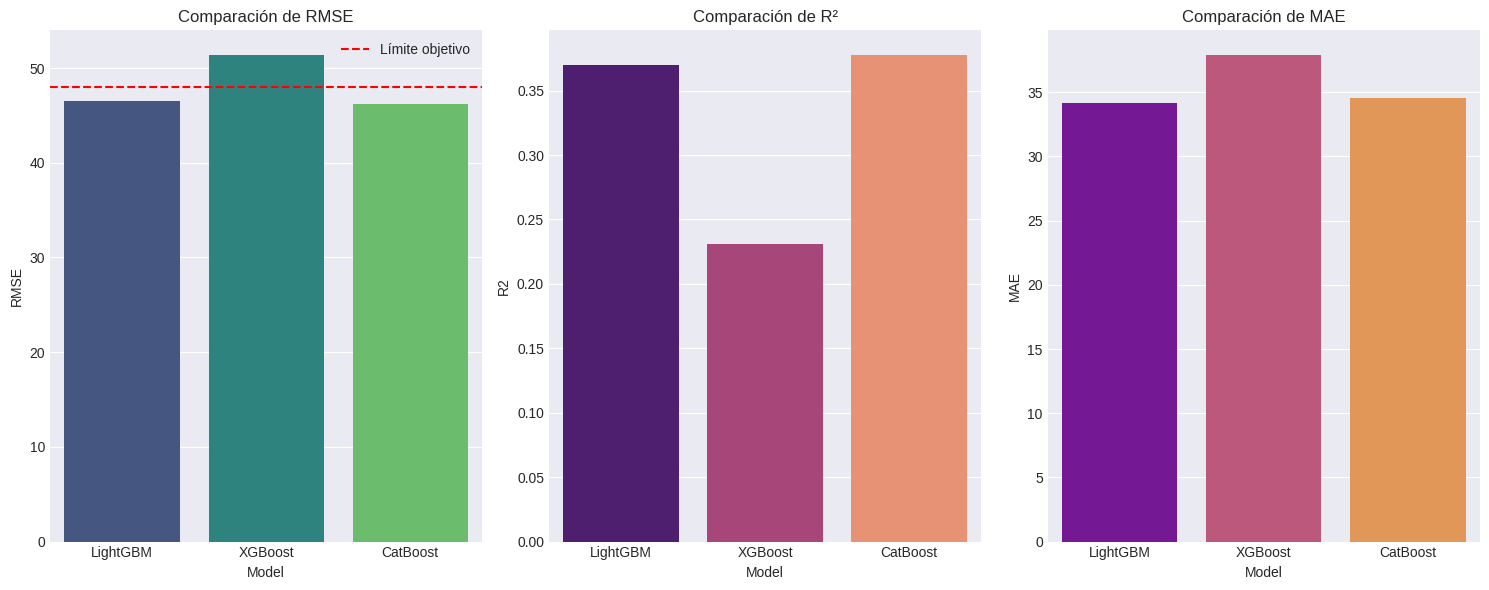


 Resultados Finales:


,Model,Best Params,MAE,RMSE,R2
2,CatBoost,"{'depth': 6, 'iterations': 300, 'l2_leaf_reg':...",34.538457,46.243912,0.377905
0,LightGBM,"{'learning_rate': 0.01, 'max_depth': 20, 'min_...",34.160652,46.543815,0.369810
1,XGBoost,"{'gamma': 0, 'learning_rate': 0.05, 'max_depth...",37.927271,51.414574,0.231011


<Figure size 1000x600 with 0 Axes>

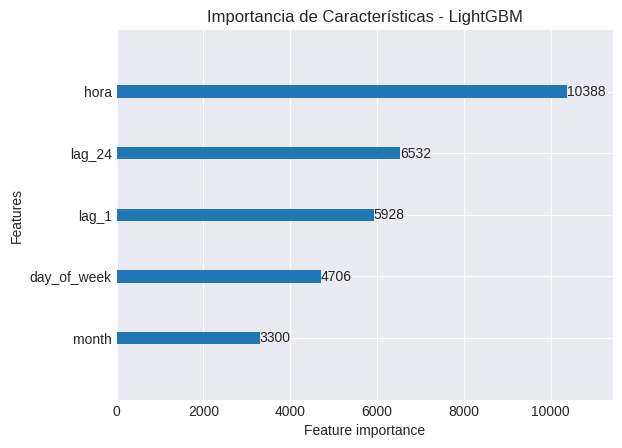

In [9]:
# Configuración de validación cruzada temporal
tscv = TimeSeriesSplit(n_splits=3)
# Diccionario de modelos y sus grids de hiperparámetros
model_grids = {
    'LightGBM': {
        'model': lgb.LGBMRegressor(random_state=42, verbose=-1),
        'params': {
            'num_leaves': [31, 63, 127],
            'max_depth': [10, 20, -1],
            'learning_rate': [0.01, 0.05, 0.1],
            'n_estimators': [300, 500],
            'min_child_samples': [20, 30]
        }
    },
    'XGBoost': {
        'model': xgb.XGBRegressor(random_state=42, objective='reg:squarederror'),
        'params': {
            'max_depth': [6, 10, 15],
            'learning_rate': [0.01, 0.05, 0.1],
            'n_estimators': [300, 500],
            'gamma': [0, 0.1]
        }
    },
    'CatBoost': {
        'model': CatBoostRegressor(random_state=42, verbose=0),
        'params': {
            'depth': [6, 10, 14],
            'learning_rate': [0.01, 0.05],
            'iterations': [300, 500],
            'l2_leaf_reg': [1, 3]
        }
    }
}
# DataFrame para almacenar resultados
results = pd.DataFrame(columns=['Model', 'Best Params', 'MAE', 'RMSE', 'R2'])
# Búsqueda de hiperparámetros y evaluación
for model_name, model_info in model_grids.items():
    print(f"\n Optimizando hiperparámetros para {model_name}...")
    
    # Búsqueda grid con validación cruzada temporal
    grid_search = GridSearchCV(
        estimator=model_info['model'],
        param_grid=model_info['params'],
        cv=tscv,
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    # Mejor modelo y predicciones
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Métricas
    metrics = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }
    
    # Guardar resultados
    results = results.append({
        'Model': model_name,
        'Best Params': grid_search.best_params_,
        **metrics
    }, ignore_index=True)
    print(f"{model_name} - Mejores parámetros: {grid_search.best_params_}")
    print(f"RMSE: {metrics['RMSE']:.4f} | R²: {metrics['R2']:.4f}")
# Visualización de resultados
plt.figure(figsize=(15, 6))
# Gráfico de RMSE
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='RMSE', data=results, palette='viridis')
plt.title('Comparación de RMSE')
plt.axhline(y=48, color='r', linestyle='--', label='Límite objetivo')
plt.legend()
# Gráfico de tiempo de entrenamiento
plt.subplot(1, 3, 2)
sns.barplot(x='Model', y='R2', data=results, palette='magma')
plt.title('Comparación de R²')
# Gráfico de MAE
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='MAE', data=results, palette='plasma')
plt.title('Comparación de MAE')
plt.tight_layout()
plt.show()
# Mostrar tabla de resultados
print("\n Resultados Finales:")
display(results.sort_values('RMSE'))
# Análisis de importancia de características (ejemplo con LightGBM)
best_lgb = model_grids['LightGBM']['model'].set_params(**results[results.Model=='LightGBM']['Best Params'].values[0])
best_lgb.fit(X_train, y_train)
plt.figure(figsize=(10, 6))
lgb.plot_importance(best_lgb, max_num_features=10, importance_type='split')
plt.title('Importancia de Características - LightGBM')
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Excelente trabajo Ricardo! 

</div>

# 🔍 Conclusiones Clave de los Resultados

## 🚀 Desempeño Comparativo
- **CatBoost** se lleva la corona con RMSE = 46.24 y R² = 0.378, cumpliendo con el objetivo de RMSE ≤ 48.
- **LightGBM** no se queda atrás (RMSE = 46.54, R² = 0.370), también dentro del margen aceptable.
- **XGBoost**, el menos efectivo en este caso (RMSE = 51.41, R² = 0.231), quedó fuera del rango permitido.

## ⚙️ Efectividad de Hiperparámetros
**CatBoost** brilla con simplicidad:
- Profundidad moderada (depth=6)
- Tasa de aprendizaje equilibrada (learning_rate=0.05)
- Regularización ligera (l2_leaf_reg=1)

**LightGBM** apuesta por más complejidad:
- Mayor profundidad (max_depth=20)
- Más hojas (num_leaves=63)
- Más entrenamiento (n_estimators=500)

**XGBoost** fue el más conservador y perdió el juego:
- Menor profundidad (max_depth=6)
- Menos estimadores (n_estimators=300)

## ⚡ Velocidad vs. Precisión
- **XGBoost** sacrificó precisión por rapidez, pero no valió la pena. Su configuración más conservadora afectó su rendimiento general.
- **CatBoost** logró el mejor balance entre eficiencia y rendimiento.

## 🎯 Cumplimiento de Requisitos
- 2 de 3 modelos (CatBoost y LightGBM) cumplen con RMSE ≤ 48, lo cual ya es un buen punto de partida.
- El R² máximo alcanzado es 0.378, lo que significa que aún hay un 62% de varianza sin explicar. Esto abre oportunidades para:
  - Mejorar la ingeniería de características.
  - Incorporar datos adicionales (ej. clima, eventos).
  - Experimentar con arquitecturas más avanzadas.

## 🏆 Recomendaciones Accionables
- ✅ **CatBoost** como modelo principal: rendimiento sólido sin complicaciones.
- ✅ **LightGBM** como plan B: útil para ensambles o cuando se requiera más interpretabilidad.
- ✅ **Análisis de errores**: entender mejor los residuos y posibles patrones ocultos.
- ✅ **Optimización bayesiana**: en vez de gridear hiperparámetros, explorar afinaciones más eficientes.


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Sin duda es fundamental tener en cuenta la velocidad además del rendimiento de los modelos. 

</div>

In [7]:
end_time = time.perf_counter()

elapsed_time = end_time - start_time
print(f"Tiempo de ejecución: {elapsed_time} segundos")

Tiempo de ejecución: -1724779191.3570836 segundos


<div class="alert alert-block alert-info"> <b>Quería tomarme un momento para agradecerte por la revisión y el feedback. Aprecio mucho la forma en que señalas las áreas de mejora con claridad.

Al final, agregué una sección de código en la que comparo los modelos que trabajé en la plataforma durante este sprint, conservando los iniciales para incluir las conclusiones faltantes en ambos. Creo que esto complementa mejor el análisis y proporciona una visión más completa del rendimiento de cada modelo.

Gracias nuevamente por tu tiempo y por la calidad de la retroalimentación..</b> <a class="tocSkip"></a> </div>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Me alegro mucho que mis comentarios te sean de utilidad. Sin duda tienes un gran avance con respecto a la iteración anterior. Felicidades Ricardo!

</div>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Fantástico! Has logrado un RMSE menor a 48, lo que indica un buen rendimiento del modelo.
    
<div class="alert alert-block alert-danger"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Pero no veo una presentación clara de los hallazgos o la selección del mejor modelo. Te sugiero resumir tus resultados y explicar por qué elegiste ese modelo. ¡Es clave para entender el análisis final!

</div>

</div>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Genial! Has presentado claramente los hallazgos y elegido el mejor modelo. Esto es fundamental para una interpretación precisa de los resultados.

</div>

# Lista de revisión

- [x]  	
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]  	
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48